# Regressão Linear

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
df = pd.read_excel(r"C:\Users\gilso\Documents\FACULDADE\Eng de Software\1° ano\PROJETOS\SIJIA\challenger-SijiA\SPRINT_MATEMÁTICA\dados_user.xlsx")
df

,Quiz,Acertos,Erros,Acertos(%),Média tempo resposta(s),Duração do quiz(min),Status
0,Exame - Hemograma,1,9,10,32.3,5.383333,REPROVADO
1,Exame - Hemograma,2,8,20,22.0,3.666667,REPROVADO
2,Exame - Hemograma,8,2,80,19.1,3.183333,APROVADO
3,Exame - Hemograma,10,0,100,18.0,3.000000,APROVADO


In [102]:
df.shape

(4, 7)

In [103]:
df.dtypes

Quiz                        object
Acertos                      int64
Erros                        int64
Acertos(%)                   int64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

In [104]:
df = df.astype({"Acertos(%)": float})
df = df.astype({"Acertos": float})

In [105]:
df.dtypes

Quiz                        object
Acertos                    float64
Erros                        int64
Acertos(%)                 float64
Média tempo resposta(s)    float64
Duração do quiz(min)       float64
Status                      object
dtype: object

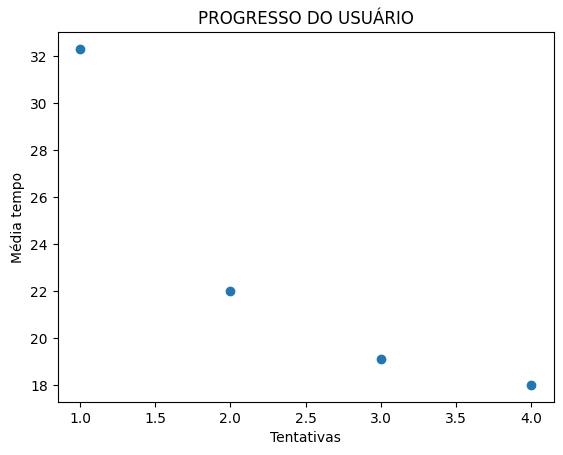

In [106]:
# Tentativas realizadas pelo usuário
tentativas = range(1,len(df)+1)

# Média de tempo por questão
duracao = df['Média tempo resposta(s)']

# Numéro de acertos do usuário
acertos = df['Acertos']

# Construindo o gráfico com as tentativas e os acertos
# plt.scatter(tentativas, acertos)
# plt.title('PROGRESSO DO USUÁRIO')
# plt.xlabel('Tentativas')
# plt.ylabel('Acertos')
# plt.show()

# Construindo o gráfico com as tentativas e a média de tempo
plt.scatter(tentativas, duracao)
plt.title('PROGRESSO DO USUÁRIO')
plt.xlabel('Tentativas')
plt.ylabel('Média tempo')
plt.show()

In [107]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [108]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [109]:
# Criação do modelo
#               eixo    y            x
regressao = smf.ols('duracao ~ tentativas', data = df).fit()

In [110]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                duracao   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     9.229
Date:                Tue, 02 Apr 2024   Prob (F-statistic):             0.0934
Time:                        11:23:35   Log-Likelihood:                -9.1504
No. Observations:                   4   AIC:                             22.30
Df Residuals:                       2   BIC:                             21.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.3000      4.129      8.308      0.0

C:\Users\gilso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [111]:
regressao.params

Intercept     34.30
tentativas    -4.58
dtype: float64

C:\Users\gilso\AppData\Local\Temp\ipykernel_18392\3048094898.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')


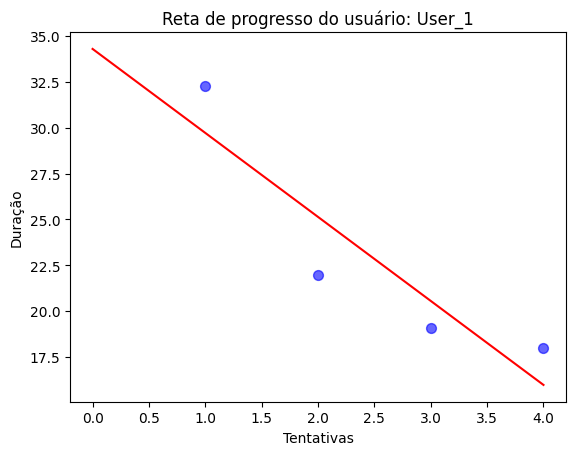

In [112]:
plt.scatter(y=duracao, x=tentativas, color='blue', s=50, alpha=0.6)
X_plot = np.linspace(0, 4)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de progresso do usuário: User_1')
plt.ylabel('Duração')
plt.xlabel('Tentativas')
plt.show()

# Regressão Polinomial

In [113]:
modelo2 = np.poly1d(np.polyfit(tentativas, duracao, 3))

In [114]:
y2 = modelo2(tentativas)
y2

array([32.3, 22. , 19.1, 18. ])

In [115]:
modelo2.coef

array([ -0.93333333,   9.3       , -31.66666667,  55.6       ])

In [116]:
print("Equação: DURAÇÃO = {:.1f}*tentativas^2 + {:.1f}*tentativas+ {:.1f}".format(modelo2.coef[0], modelo2.coef[1], modelo2.coef[2]))

Equação: DURAÇÃO = -0.9*tentativas^2 + 9.3*tentativas+ -31.7


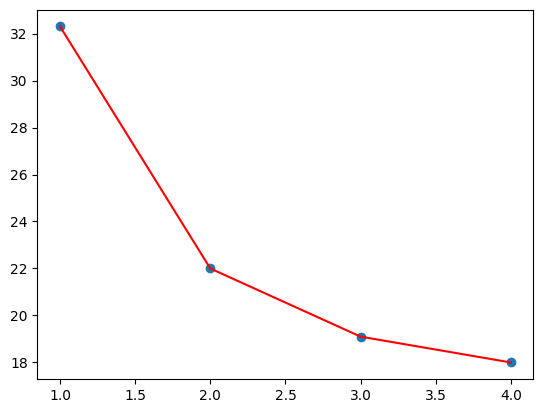

In [117]:
plt.scatter(tentativas, duracao)
plt.plot(tentativas,y2,color='red')

<Figure size 1000x600 with 0 Axes>

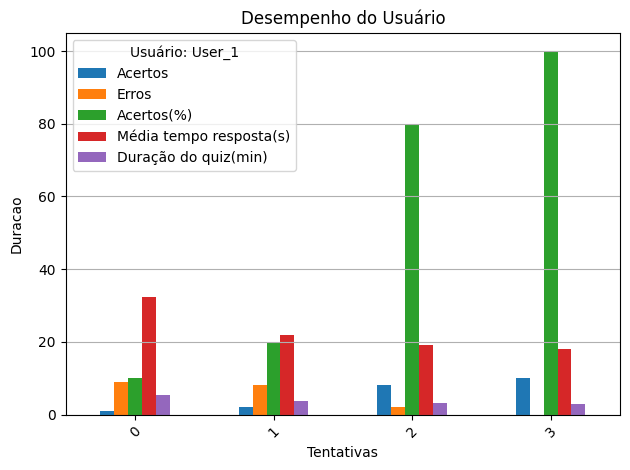

In [118]:
plt.figure(figsize=(10, 6))
df.plot(kind='bar', stacked=False)
                
plt.title("Desempenho do Usuário")
plt.xlabel("Tentativas")
plt.ylabel("Duracao")
plt.xticks(rotation=45)
plt.legend(title='Usuário: User_1')
plt.grid(axis='y')
plt.tight_layout()
plt.show()